# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df=pd.DataFrame(cities)
cities_df.columns=['cities']
cities_df

,cities
0,cockburn town
1,kununurra
2,arman
3,airai
4,attawapiskat
...,...
618,ahuimanu
619,kjollefjord
620,biskamzha
621,nome


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_name=[]
lats = []
lngs = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for index,row in cities_df.iterrows(): 
    print(f"Processing Record {index}, {row}")    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + row['cities'] +"&units=imperial"
        response = requests.get(query_url).json()  
        city_name.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt']) 
    except:
        print("City not found. Skipping...")
        city_name.append("")
        lats.append("")
        lngs.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("") 

Processing Record 0, cities    cockburn town
Name: 0, dtype: object
Processing Record 1, cities    kununurra
Name: 1, dtype: object
Processing Record 2, cities    arman
Name: 2, dtype: object
Processing Record 3, cities    airai
Name: 3, dtype: object
Processing Record 4, cities    attawapiskat
Name: 4, dtype: object
City not found. Skipping...
Processing Record 5, cities    grindavik
Name: 5, dtype: object
Processing Record 6, cities    new norfolk
Name: 6, dtype: object
Processing Record 7, cities    albany
Name: 7, dtype: object
Processing Record 8, cities    belushya guba
Name: 8, dtype: object
City not found. Skipping...
Processing Record 9, cities    lokosovo
Name: 9, dtype: object
Processing Record 10, cities    avarua
Name: 10, dtype: object
Processing Record 11, cities    sorong
Name: 11, dtype: object
Processing Record 12, cities    atuona
Name: 12, dtype: object
Processing Record 13, cities    fort-shevchenko
Name: 13, dtype: object
Processing Record 14, cities    seybaplaya

In [7]:
len(lats)

623

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dataframe
cities_df["city_name"]= cities
cities_df["city"]= city_name
cities_df["lats"]= lats
cities_df["lngs"]= lngs
cities_df["max_temp"]= max_temp
cities_df["humidity"]= humidity
cities_df["cloudiness"]= cloudiness
cities_df["wind_speed"]=wind_speed
cities_df["country"]=  country
cities_df["date"]= date
cities_df=cities_df[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df

,city_name,city,lats,lngs,max_temp,humidity,cloudiness,wind_speed,country,date
0,cockburn town,Cockburn Town,21.46,-71.14,83.53,79,92,11.65,TC,1600736411
1,kununurra,Kununurra,-15.77,128.73,93.2,30,0,5.82,AU,1600736687
2,arman,Arman',59.7,150.17,45.99,53,0,0.47,RU,1600736687
3,airai,Airai,-8.93,125.41,74.89,51,100,5.14,TL,1600736632
4,attawapiskat,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
618,ahuimanu,‘Āhuimanu,21.44,-157.84,84.2,62,20,13.87,US,1600736658
619,kjollefjord,Kjøllefjord,70.95,27.35,45.41,86,95,14.94,NO,1600736786
620,biskamzha,Biskamzha,53.45,89.53,52.52,66,2,1.9,RU,1600736786
621,nome,Nome,64.5,-165.41,51.01,57,75,4.7,US,1600736555


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cities_df2=cities_df[["lats","lngs","max_temp","humidity","cloudiness","wind_speed"]].apply(pd.to_numeric) 
print(cities_df2.dtypes) 
cities_df2["city_name"]= cities
cities_df2["city"]= city_name
cities_df2["country"]=  country
cities_df2["date"]= date
cities_df2=cities_df2[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df2
  

lats          float64
lngs          float64
max_temp      float64
humidity      float64
cloudiness    float64
wind_speed    float64
dtype: object


,city_name,city,lats,lngs,max_temp,humidity,cloudiness,wind_speed,country,date
0,cockburn town,Cockburn Town,21.46,-71.14,83.53,79.0,92.0,11.65,TC,1600736411
1,kununurra,Kununurra,-15.77,128.73,93.20,30.0,0.0,5.82,AU,1600736687
2,arman,Arman',59.70,150.17,45.99,53.0,0.0,0.47,RU,1600736687
3,airai,Airai,-8.93,125.41,74.89,51.0,100.0,5.14,TL,1600736632
4,attawapiskat,,NaN,NaN,NaN,NaN,NaN,NaN,,
...,...,...,...,...,...,...,...,...,...,...
618,ahuimanu,‘Āhuimanu,21.44,-157.84,84.20,62.0,20.0,13.87,US,1600736658
619,kjollefjord,Kjøllefjord,70.95,27.35,45.41,86.0,95.0,14.94,NO,1600736786
620,biskamzha,Biskamzha,53.45,89.53,52.52,66.0,2.0,1.90,RU,1600736786
621,nome,Nome,64.50,-165.41,51.01,57.0,75.0,4.70,US,1600736555


In [10]:
#  Get the indices of cities that have humidity greater or equal to 100%.
humidity_100 = cities_df2.loc[(cities_df2['humidity'] >= 100)]
humidity_100.count()

city_name     15
city          15
lats          15
lngs          15
max_temp      15
humidity      15
cloudiness    15
wind_speed    15
country       15
date          15
dtype: int64

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
clean_city_data =cities_df2.loc[cities_df2['humidity'] < 100]
clean_city_data['humidity'].count()

555

In [12]:
clean_city_data['humidity'].max()

99.0

In [13]:
# Extract relevant fields from the data frame

clean_city_data2 = clean_city_data[["city","lngs","lats","max_temp","humidity","cloudiness","wind_speed"]]

clean_city_data2

# Export the City_Data into a csv

clean_city_data2.to_csv('Output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

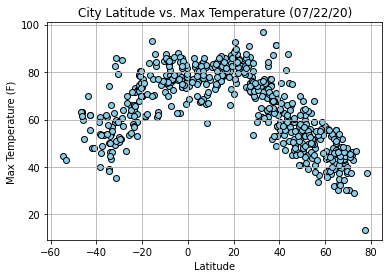

In [14]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["max_temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

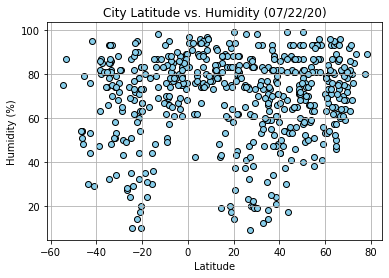

In [15]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

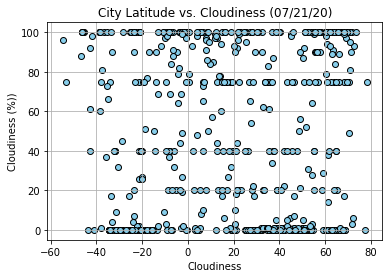

In [16]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/21/20)")
plt.xlabel("Cloudiness")
plt.ylabel("Cloudiness (%))")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

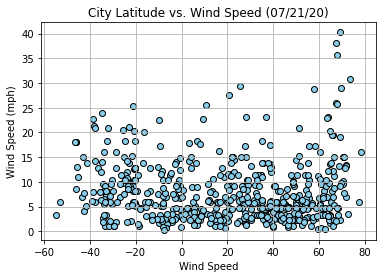

In [17]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["wind_speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/21/20)")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames

north_hem=clean_city_data2.loc[clean_city_data2['lats'] >= 0]
north_hem
south_hem=clean_city_data2.loc[clean_city_data2['lats'] < 0]
south_hem

,city,lngs,lats,max_temp,humidity,cloudiness,wind_speed
1,Kununurra,128.73,-15.77,93.20,30.0,0.0,5.82
3,Airai,125.41,-8.93,74.89,51.0,100.0,5.14
6,New Norfolk,147.06,-42.78,62.01,53.0,61.0,4.00
10,Avarua,-159.78,-21.21,78.80,78.0,26.0,5.82
11,Sorong,131.25,-0.88,78.53,85.0,100.0,6.82
...,...,...,...,...,...,...,...
597,Port Moresby,147.18,-9.44,86.00,70.0,40.0,17.22
608,Cruzeiro do Sul,-51.99,-29.51,52.00,82.0,0.0,1.01
609,Uíge,15.06,-7.61,65.53,88.0,0.0,0.27
610,Gizo Government Station,156.84,-8.10,84.56,70.0,100.0,5.66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

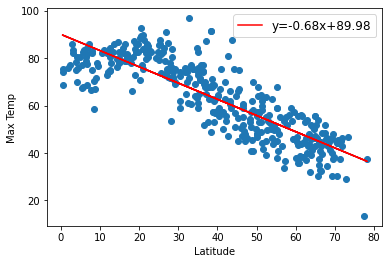

In [19]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['max_temp'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['max_temp'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

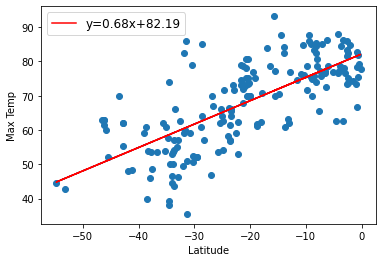

In [20]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['max_temp'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['max_temp'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

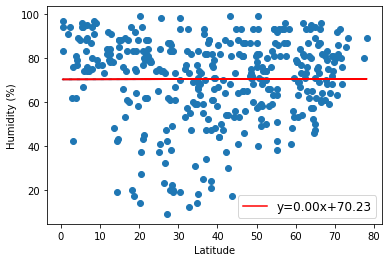

In [21]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['humidity'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['humidity'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

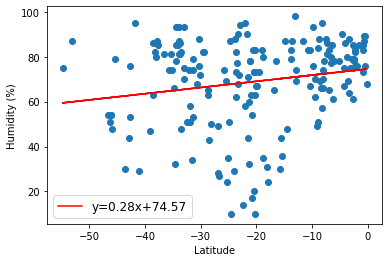

In [22]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['humidity'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['humidity'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

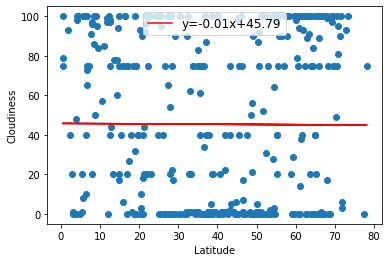

In [23]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['cloudiness'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['cloudiness'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

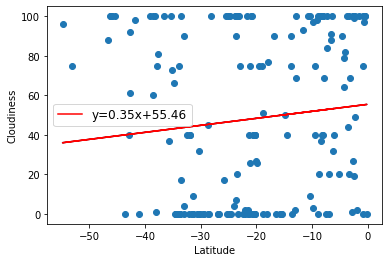

In [24]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['cloudiness'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['cloudiness'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

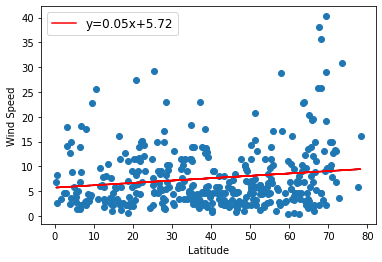

In [25]:
slope, intercept, r, p,std_err = linregress(
    north_hem['lats'], north_hem['wind_speed'])
fit = slope * north_hem['lats'] + intercept
plt.scatter(north_hem['lats'],north_hem['wind_speed'])
plt.plot(north_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(north_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

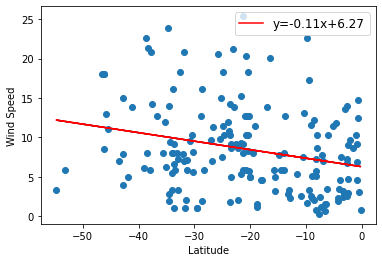

In [26]:
slope, intercept, r, p,std_err = linregress(
    south_hem['lats'], south_hem['wind_speed'])
fit = slope * south_hem['lats'] + intercept
plt.scatter(south_hem['lats'],south_hem['wind_speed'])
plt.plot(south_hem['lats'],fit,"--")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(south_hem['lats'], fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=12)
plt.show()

In [30]:
html_table = clean_city_data2.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>city</th>\n      <th>lngs</th>\n      <th>lats</th>\n      <th>max_temp</th>\n      <th>humidity</th>\n      <th>cloudiness</th>\n      <th>wind_speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Cockburn Town</td>\n      <td>-71.14</td>\n      <td>21.46</td>\n      <td>83.53</td>\n      <td>79.0</td>\n      <td>92.0</td>\n      <td>11.65</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Kununurra</td>\n      <td>128.73</td>\n      <td>-15.77</td>\n      <td>93.20</td>\n      <td>30.0</td>\n      <td>0.0</td>\n      <td>5.82</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Arman\'</td>\n      <td>150.17</td>\n      <td>59.70</td>\n      <td>45.99</td>\n      <td>53.0</td>\n      <td>0.0</td>\n      <td>0.47</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Airai</td>\n      <td>125.41</td>\n      <td>-8.93</td>\n      <td>74.

In [31]:
clean_city_data2.to_html('data.html')